In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

Cluster_DF - Contains 6 clusters, 3 each for the Rams and Bengals. Since Netiher of the teams have played against each other, we used Clustering to determine LA's performance against teams that have a similar defensive rating to Cincinnati & Vice versa. These cluster means are then fed into the model to predict each teams performance, and a weighted average based on cluster size is taken to obtain the final result. 

In [ ]:
df_ = pd.read_excel('/content/drive/MyDrive/All Team Matches.xlsx')
Cluster_df_ = pd.read_excel('/content/drive/MyDrive/LA_cluster_means.xlsx')
df = df_.copy()
Cluster_df = Cluster_df_.copy()

df['OT'] = df['OT'].fillna(0)
df['OT'] = df['OT'].replace(['OT'],1)
df.dropna(inplace = True)
#df.drop(columns=['Date','Time'], axis = 1, inplace = True)
df.isna().sum()

Team           0
Day            0
Date           0
Time           0
Result         0
OT             0
Home           0
Opp            0
Team Score     0
Opp Score      0
Off 1stD       0
Off TotYd      0
Off PassY      0
Off RushY      0
Off Total      0
Def 1stD       0
Def TotYd      0
Def PassY      0
Def RushY      0
Def Total      0
Exp Offense    0
Exp Defense    0
Exp Sp. Tms    0
dtype: int64

In [ ]:
cols_to_norm = ['Opp Score', 'Off 1stD', 'Off TotYd', 'Off PassY',
       'Off RushY', 'Off Total', 'Def 1stD', 'Def TotYd', 'Def PassY',
       'Def RushY', 'Def Total']
Cluster_df[cols_to_norm] = Cluster_df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
Cluster_df.head()

,Opp Score,Off 1stD,Off TotYd,Off PassY,Off RushY,Off Total,Def 1stD,Def TotYd,Def PassY,Def RushY,Def Total
0,0.920455,0.000000,0.556962,0.672387,0.253353,1.000000,0.789474,0.274390,0.664151,0.000000,1.000000
1,0.570076,1.000000,1.000000,0.986999,0.290611,0.404762,0.197368,0.000000,0.190881,0.042466,0.027778
2,0.806818,0.702703,0.880450,1.000000,0.000000,0.444444,0.964912,1.000000,0.638994,1.000000,0.166667
3,0.000000,0.486486,0.894515,0.976599,0.096870,0.000000,0.210526,0.132927,0.177358,0.233425,0.250000
4,0.886364,0.940541,0.000000,0.000000,1.000000,0.285714,0.000000,0.469512,0.000000,0.841644,0.083333


In [ ]:
X.head()

,Opp Score,Off 1stD,Off TotYd,Off PassY,Off RushY,Off Total,Def 1stD,Def TotYd,Def PassY,Def RushY,Def Total
0,38.0,14.0,229.0,186.0,43.0,3,22.0,322.0,151.0,171.0,0
1,17.0,25.0,323.0,227.0,96.0,0,19.0,344.0,236.0,108.0,2
2,28.0,21.0,353.0,253.0,100.0,0,26.0,298.0,231.0,67.0,2
3,17.0,23.0,367.0,236.0,131.0,1,17.0,282.0,220.0,62.0,2
4,22.0,21.0,466.0,333.0,133.0,1,18.0,367.0,264.0,103.0,2


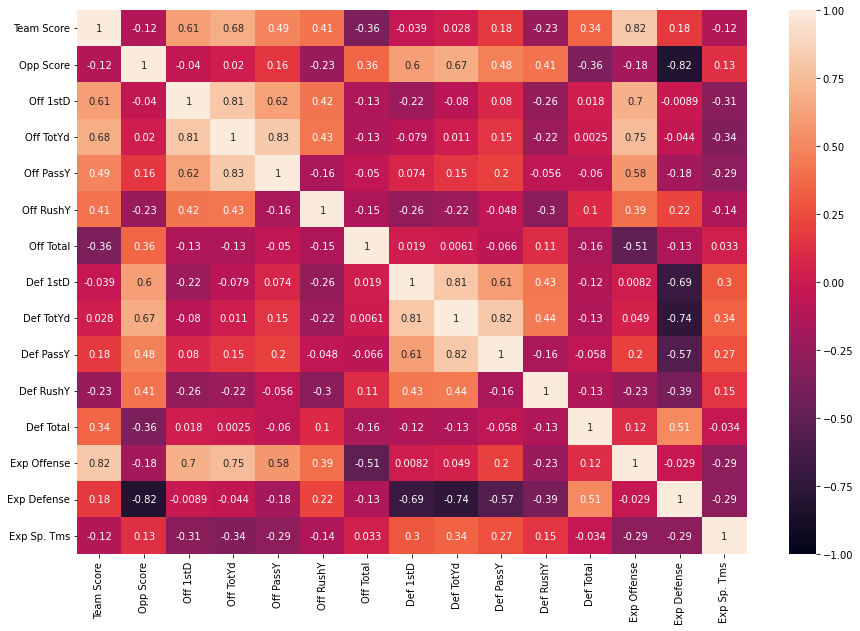

In [ ]:
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True) 

In [ ]:
df.columns

Index(['Team', 'Day', 'Date', 'Time', 'Result', 'OT', 'Home', 'Opp',
       'Team Score', 'Opp Score', 'Off 1stD', 'Off TotYd', 'Off PassY',
       'Off RushY', 'Off Total', 'Def 1stD', 'Def TotYd', 'Def PassY',
       'Def RushY', 'Def Total', 'Exp Offense', 'Exp Defense', 'Exp Sp. Tms'],
      dtype='object')

#Linear Regression

In [ ]:
from sklearn .model_selection import train_test_split
X = df[['Opp Score', 'Off 1stD', 'Off TotYd', 'Off PassY',
       'Off RushY', 'Off Total', 'Def 1stD', 'Def TotYd', 'Def PassY',
       'Def RushY', 'Def Total']]
y = df[df.columns[df.columns == 'Team Score']]

#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# check the shape of X_train and X_test
#X_train.shape, X_test.shape

In [ ]:
X #Normalized data

,Opp Score,Off 1stD,Off TotYd,Off PassY,Off RushY,Off Total,Def 1stD,Def TotYd,Def PassY,Def RushY,Def Total
0,0.678571,0.344828,0.344697,0.380952,0.160584,0.6,0.56250,0.524809,0.348115,0.627737,0.0
1,0.303571,0.724138,0.522727,0.462302,0.354015,0.0,0.46875,0.566794,0.536585,0.397810,0.4
2,0.500000,0.586207,0.579545,0.513889,0.368613,0.0,0.68750,0.479008,0.525499,0.248175,0.4
3,0.303571,0.655172,0.606061,0.480159,0.481752,0.2,0.40625,0.448473,0.501109,0.229927,0.4
4,0.392857,0.586207,0.793561,0.672619,0.489051,0.2,0.43750,0.610687,0.598670,0.379562,0.4
...,...,...,...,...,...,...,...,...,...,...,...
548,0.178571,0.724138,0.589015,0.357143,0.675182,0.0,0.40625,0.513359,0.452328,0.434307,0.4
549,0.267857,0.517241,0.464015,0.327381,0.489051,0.2,0.25000,0.385496,0.314856,0.416058,0.0
550,0.303571,0.137931,0.210227,0.289683,0.069343,0.0,0.56250,0.562977,0.416851,0.587591,0.6
551,0.607143,0.482759,0.515152,0.480159,0.306569,0.2,0.53125,0.561069,0.538803,0.383212,0.0


In [ ]:
y

,Team Score
0,3.0
1,35.0
2,30.0
3,27.0
4,25.0
...,...
548,38.0
549,10.0
550,13.0
551,13.0


In [ ]:
cols_to_norm = ['Opp Score', 'Off 1stD', 'Off TotYd', 'Off PassY',
       'Off RushY', 'Off Total', 'Def 1stD', 'Def TotYd', 'Def PassY',
       'Def RushY', 'Def Total']
X[cols_to_norm] = X[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols
reg = sm.OLS(y, X).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:             Team Score   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     114.1
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          6.17e-119
Time:                        10:05:19   Log-Likelihood:                -1779.1
No. Observations:                 551   AIC:                             3578.
Df Residuals:                     541   BIC:                             3621.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Opp Score      2.9382      2.417      1.216      0.2

In [ ]:
reg.predict(X)

0       6.232119
1      26.992612
2      29.284934
3      27.683780
4      33.319996
         ...    
548    30.166900
549    15.244651
550    13.043133
551    18.034401
552    23.543755
Length: 551, dtype: float64

In [ ]:
reg.predict(Cluster_df) #First 3 records show LA's predicted performance based on variations of Cincinnatis defensive performance across the season

0    12.950284
1    31.114356
2    32.730957
3    29.252254
4     3.088839
5     7.882942
dtype: float64

# Decision Tree Model

In [ ]:
df_.head()

,Team,Day,Date,Time,Result,OT,Home,Opp,Team Score,Opp Score,Off 1stD,Off TotYd,Off PassY,Off RushY,Off Total,Def 1stD,Def TotYd,Def PassY,Def RushY,Def Total,Exp Offense,Exp Defense,Exp Sp. Tms
0,Green Bay Packers,Sun,2022-09-12 00:00:00,4:25PM ET,L,NaN,N,New Orleans Saints,3.0,38.0,14.0,229.0,186.0,43.0,3,22.0,322.0,151.0,171.0,0,-14.83,-20.22,1.59
1,Green Bay Packers,Mon,2022-09-20 00:00:00,8:15PM ET,W,NaN,Y,Detroit Lions,35.0,17.0,25.0,323.0,227.0,96.0,0,19.0,344.0,236.0,108.0,2,19.91,0.27,-3.69
2,Green Bay Packers,Sun,2022-09-26 00:00:00,8:20PM ET,W,NaN,N,San Francisco 49ers,30.0,28.0,21.0,353.0,253.0,100.0,0,26.0,298.0,231.0,67.0,2,15.14,-12.19,-0.95
3,Green Bay Packers,Sun,2022-10-03 00:00:00,4:25PM ET,W,NaN,Y,Pittsburgh Steelers,27.0,17.0,23.0,367.0,236.0,131.0,1,17.0,282.0,220.0,62.0,2,7.14,5.05,-3.23
4,Green Bay Packers,Sun,2022-10-10 00:00:00,1:00PM ET,W,OT,N,Cincinnati Bengals,25.0,22.0,21.0,466.0,333.0,133.0,1,18.0,367.0,264.0,103.0,2,9.92,-3.92,-3.51


In [ ]:
df.columns

Index(['Team', 'Day', 'Date', 'Time', 'Result', 'OT', 'Home', 'Opp',
       'Team Score', 'Opp Score', 'Off 1stD', 'Off TotYd', 'Off PassY',
       'Off RushY', 'Off Total', 'Def 1stD', 'Def TotYd', 'Def PassY',
       'Def RushY', 'Def Total', 'Exp Offense', 'Exp Defense', 'Exp Sp. Tms'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Team'] = labelencoder.fit_transform(df['Team'])
df['Day'] = labelencoder.fit_transform(df['Day'])
df['Result'] = labelencoder.fit_transform(df['Result'])
df['OT'] = labelencoder.fit_transform(df['OT'])
df['Home'] = labelencoder.fit_transform(df['Home'])
df['Opp'] = labelencoder.fit_transform(df['Opp'])

In [ ]:
from sklearn .model_selection import train_test_split
X = df[['Team', 'Day', 'Result', 'OT', 'Home', 'Opp',
        'Opp Score', 'Off 1stD', 'Off TotYd', 'Off PassY',
       'Off RushY', 'Off Total', 'Def 1stD', 'Def TotYd', 'Def PassY',
       'Def RushY', 'Def Total', 'Exp Offense', 'Exp Defense', 'Exp Sp. Tms']]
y = df[df.columns[df.columns == 'Team Score']]

#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# check the shape of X_train and X_test
#X_train.shape, X_test.shape

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier(splitter='best')   # max depth for decition tree is level 3

# Train Decision Tree Classifer
clf = clf.fit(X,y)

#Predict the response for test dataset
y_pred_tree = clf.predict(X)

In [ ]:
y_pred_tree

array([ 3., 35., 30., 27., 25., 24., 24., 24.,  7., 17., 31., 36., 45.,
       31., 24., 37., 30., 10., 31., 48., 24., 19., 45., 28., 38., 27.,
       19., 30., 38., 30., 33.,  0., 32., 28., 41., 31., 27., 29., 20.,
       41., 36., 44., 35., 20., 16., 43.,  9., 33., 27., 27., 21., 56.,
       22., 51., 17., 34., 27., 34., 20., 26., 38., 28., 38., 16., 10.,
       28., 37., 30., 20., 30., 20., 24., 34., 30., 20., 38., 34., 31.,
       37., 17., 37., 31., 21., 31., 10., 23., 33., 23., 12., 16., 25.,
       30., 11., 41., 17., 28., 21., 10., 18., 33., 17., 31., 30., 34.,
       23., 26., 31., 17., 23., 27., 23., 13., 17., 32., 11., 21., 30.,
       21., 22., 22., 44., 24., 30., 40.,  7., 33., 27., 34., 20., 26.,
       15., 38.,  7., 28., 21., 33., 13., 36., 25., 21., 29.,  6., 17.,
       30.,  9.,  3., 18., 30., 24., 33., 30.,  7., 19., 34., 16., 31.,
       27., 34., 26., 27., 36., 17., 23., 10., 31., 16., 30., 21., 34.,
       22., 13., 10., 10., 29., 27., 17., 17., 20., 17., 14., 16

KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors =2)
neigh.fit(X,y)
pred = neigh.predict(Cluster_df)
print(pred)

[ 9. 27. 30. 16. 10. 13.]


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


XGBOOST

In [ ]:
!pip install xgboost
!pip install-= --upgrade xgboost

ERROR: unknown command "install-=" - maybe you meant "install"


In [ ]:
from xgboost import XGBClassifier
xgboost  = XGBClassifier()
xgboost.fit(X,y)
pred = xgboost.predict(Cluster_df)
print(type(pred))
pred

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<class 'numpy.ndarray'>


array([34., 34., 30., 26.,  3., 21.])

In [ ]:
#We select XG Boost as it has the best performance amongst all models
import numpy as np

weights = np.array([0.1,0.6,0.3,0.25,0.25,0.5]) #Weights based on number of datapoints in each of the clusters

final_pred = pred*weights
print(final_pred)
LA_score =round( final_pred[0]+final_pred[1]+final_pred[2])
Cincinnati_score = round(final_pred[3]+final_pred[4]+final_pred[5])
print('LA: ', LA_score,"Cincinnati: ",Cincinnati_score)

[ 3.4  20.4   9.    6.5   0.75 10.5 ]
LA:  33 Cincinnati:  18
